In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#data loading

In [ ]:
%pwd

'/content'

In [ ]:
%ls

drive/  sample_data/


In [17]:
import os
#path of parasirtized dataset folder
path_pa = "/content/drive/MyDrive/dataset/Parasitized/"
#path of uninfected dataset folder
path_un = "/content/drive/MyDrive/dataset/Uninfected/"

parasitized_path = "/content/drive/MyDrive/dataset/Parasitized/"
uninfected_path = "/content/drive/MyDrive/dataset/Uninfected/"

parasitized_ids = next(os.walk(path_pa))[2]
uninfected_ids = next(os.walk(path_un))[2]

ids = parasitized_ids+uninfected_ids

#Data Resizing

In [19]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

In [20]:
import numpy as np

A = np.zeros((len(parasitized_ids) + len(uninfected_ids), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
B = np.zeros(len(parasitized_ids) + len(uninfected_ids))

In [21]:
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize

for n, id_ in tqdm(enumerate(ids), total=len(ids)): 
    try:
        if n < len(ids)/2:
            path = path_pa + id_
            img = imread(path)[:,:,:IMG_CHANNELS]  
            img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
            A[n] = img  #Fill empty X_train with values from img      
            B[n] = 1 

        else:
            path = path_un + id_
            img = imread(path)[:,:,:IMG_CHANNELS]  
            img = resize(img, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
            A[n] = img  #Fill empty X_train with values from img      
            B[n] = 0 
    
    except:
        continue

print('cell images Resized')

100%|██████████| 27560/27560 [1:23:02<00:00,  5.53it/s]

cell images Resized


In [22]:
from sklearn.utils import shuffle
X, Y = shuffle(A, B, random_state=0)

#Model1 - Evaluated and Designed on the specifications from Assessment Documentation. 
with 75% train data,15% valid,10% test data


In [23]:
x_train1, y_train1 = X[:int(0.75*len(X))], Y[:int(0.75*len(X))]
x_test1, y_test1 = X[int(0.5*len(X)):int(0.6*len(X))], Y[int(0.5*len(X)):int(0.6*len(X))]

In [24]:
# No of images in set of infected cells.
print("Number of infected cells in the training set: " + str(len(x_train1[y_train1 == 1])))
print("Number of infected cells in the test set: " + str(len(x_test1[y_test1 == 1])))

print('\n')
# No of images in set of uninfected cells.
print("Number of uninfected cells in the training set: " + str(len(x_train1[y_train1 == 0])))

Number of infected cells in the training set: 10369
Number of infected cells in the test set: 1360


Number of uninfected cells in the training set: 10301


In [29]:
import keras
from keras import regularizers
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization
model1=Sequential()

model1.add(Conv2D(16,(9,9) ,padding="same",activation="relu",input_shape=(128,128,3)))
model1.add(MaxPooling2D(2,2))
model1.add(BatchNormalization(axis = -1))
model1.add(Conv2D(32,(7,7) ,padding="same",activation="relu"))
model1.add(MaxPooling2D(2,2))
model1.add(BatchNormalization(axis = -1))
model1.add(Flatten())
#l2 regularizer
model1.add(Dense(64,kernel_regularizer=regularizers.l2(0.01),activation="relu"))
model1.add(Dropout(0.5))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1,activation='sigmoid'))#2 represent 
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 16)      3904      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 32)        25120     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                      

In [27]:
import tensorflow as tf
#Modelcheckpoint
callbacks = [
    # assuming the goal of the trianing is to minimize loss so using earlystopping to Stop training when a monitored metric has stopped improving
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs'),
        tf.keras.callbacks.ModelCheckpoint('cell_model2.h5', verbose=1, save_best_only=True)]

results = model1.fit(x_train1, y_train1,validation_split=0.1,epochs=25, callbacks=callbacks)

Epoch 1/25
582/582 [==============================] - ETA: 0s - loss: 1.4431 - accuracy: 0.5747
Epoch 1: val_loss improved from inf to 1.01652, saving model to cell_model2.h5
582/582 [==============================] - 895s 2s/step - loss: 1.4431 - accuracy: 0.5747 - val_loss: 1.0165 - val_accuracy: 0.6076
Epoch 2/25
582/582 [==============================] - ETA: 0s - loss: 0.9285 - accuracy: 0.6201
Epoch 2: val_loss improved from 1.01652 to 0.90150, saving model to cell_model2.h5
582/582 [==============================] - 934s 2s/step - loss: 0.9285 - accuracy: 0.6201 - val_loss: 0.9015 - val_accuracy: 0.6251
Epoch 3/25
582/582 [==============================] - ETA: 0s - loss: 0.8456 - accuracy: 0.6338
Epoch 3: val_loss improved from 0.90150 to 0.81893, saving model to cell_model2.h5
582/582 [==============================] - 915s 2s/step - loss: 0.8456 - accuracy: 0.6338 - val_loss: 0.8189 - val_accuracy: 0.6372
Epoch 4/25
582/582 [==============================] - ETA: 0s - loss: 0

In [28]:
print("Test_Accuracy: {:.2f}%".format(model1.evaluate(np.array(x_test1), np.array(y_test1))[1]*100))

87/87 [==============================] - 36s 412ms/step - loss: 0.7958 - accuracy: 0.6930
Test_Accuracy: 69.30%


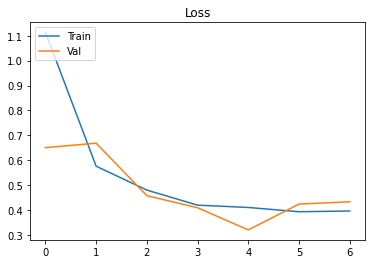

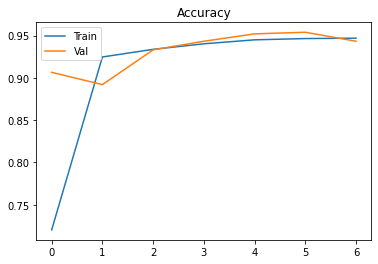

In [39]:
import matplotlib.pyplot as plt
loss_curve = results.history["loss"]
acc_curve = results.history["accuracy"]

loss_val_curve = results.history["val_loss"]
acc_val_curve = results.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [40]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

y_pred1 = model1.predict(x_test1)
y_pred1 = [1 if i>=0.5 else 0 for i in y_pred1]

print('{} \n{} \n{}'.format(confusion_matrix(y_test1, y_pred1) , 
                           classification_report(y_test1 , y_pred1) , 
                           accuracy_score(y_test1 , y_pred1)))

87/87 [==============================] - 35s 400ms/step
[[   0 1396]
 [   0 1360]] 
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      1396
         1.0       0.49      1.00      0.66      1360

    accuracy                           0.49      2756
   macro avg       0.25      0.50      0.33      2756
weighted avg       0.24      0.49      0.33      2756
 
0.4934687953555878


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


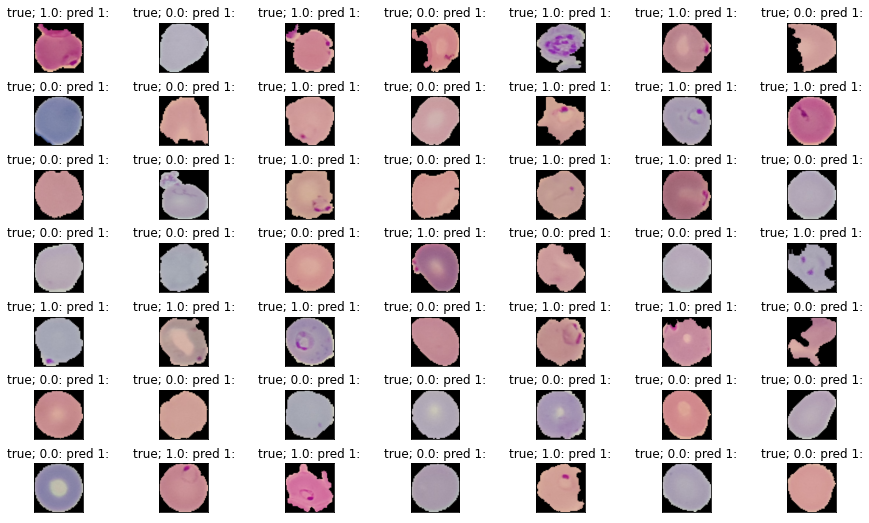

In [43]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint( 0  , x_test1.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(x_test1[r[0]])
    plt.title('true; {}: pred {}:'.format(y_test1[r[0]] , y_pred1[r[0]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

Number of mistakes: 1396


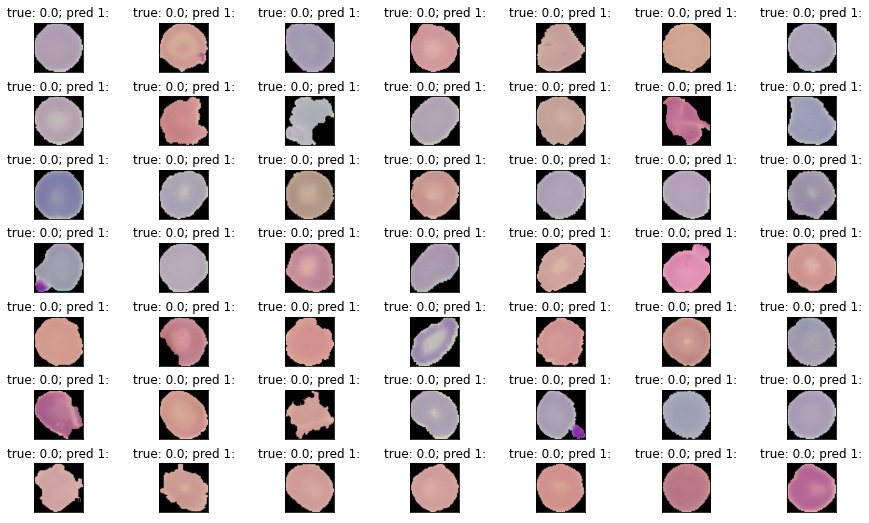

In [45]:
errors = []

for i in range(len(x_test1)):
    if y_test1[i] != y_pred1[i]:
        errors.append(i)

print("Number of mistakes: {}".format(len(errors)))

plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    # r = np.random.randint( 0  , X_test.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(x_test1[errors[i]])
    plt.title('true: {}; pred {}:'.format(y_test1[errors[i]] , y_pred1[errors[i]]))
    plt.xticks([]) , plt.yticks([])

# Model2 - New approach to improve model accuracy.

In [31]:
IMG_WIDTH1 = 60
IMG_HEIGHT1 = 60
#IMG_CHANNELS1 = 3

In [32]:
import numpy as np

M = np.zeros((len(parasitized_ids) + len(uninfected_ids), IMG_HEIGHT1, IMG_WIDTH1, IMG_CHANNELS), dtype=np.uint8)
N = np.zeros(len(parasitized_ids) + len(uninfected_ids))

In [33]:
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize

for n, id_ in tqdm(enumerate(ids), total=len(ids)): 
    try:
        if n < len(ids)/2:
            path = path_pa + id_
            img = imread(path)[:,:,:IMG_CHANNELS]  
            img = resize(img, (IMG_HEIGHT1, IMG_WIDTH1), mode='constant', preserve_range=True)
            M[n] = img  #Fill empty X_train with values from img      
            N[n] = 1 

        else:
            path = path_un + id_
            img = imread(path)[:,:,:IMG_CHANNELS]  
            img = resize(img, (IMG_HEIGHT1, IMG_WIDTH1), mode='constant', preserve_range=True)
            M[n] = img  #Fill empty X_train with values from img      
            N[n] = 0 
    
    except:
        continue

print('cell images Resized')

100%|██████████| 27560/27560 [04:53<00:00, 93.97it/s] 

cell images Resized


In [35]:
x_train1, y_train1 = X[:int(0.75*len(X))], Y[:int(0.75*len(X))]
x_test1, y_test1 = X[int(0.5*len(X)):int(0.6*len(X))], Y[int(0.5*len(X)):int(0.6*len(X))]

In [34]:
import keras
from keras import regularizers
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout,BatchNormalization
model2=Sequential()

model2.add(Conv2D(16,(3,3) ,padding="same",activation="relu",input_shape=(128,128,3)))
model2.add(MaxPooling2D(2,2))
model2.add(BatchNormalization(axis = -1))
model2.add(Dropout(0.2))
model2.add(Conv2D(32,(3,3) ,padding="same",activation="relu"))
model2.add(MaxPooling2D(2,2))
model2.add(BatchNormalization(axis = -1))
model2.add(Dropout(0.2))
model2.add(Conv2D(64,(3,3) ,padding="same",activation="relu"))
model2.add(MaxPooling2D(2,2))
model2.add(BatchNormalization(axis = -1))
model2.add(Dropout(0.2))
model2.add(Flatten())
#l2 regularizer
model2.add(Dense(64,kernel_regularizer=regularizers.l2(0.01),activation="relu"))
model2.add(Dropout(0.3))
model2.add(Dense(32, activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 batch_normalization_2 (Batc  (None, 64, 64, 16)       64        
 hNormalization)                                                 
                                                                 
 dropout_4 (Dropout)         (None, 64, 64, 16)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 32, 32, 32)      

In [36]:
import tensorflow as tf
#Modelcheckpoint
callbacks = [
    # assuming the goal of the trianing is to minimize loss so using earlystopping to Stop training when a monitored metric has stopped improving
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs'),
        tf.keras.callbacks.ModelCheckpoint('cell_model3.h5', verbose=1, save_best_only=True)]

results = model2.fit(x_train1, y_train1,validation_split=0.1,epochs=25, callbacks=callbacks)

Epoch 1/25
582/582 [==============================] - ETA: 0s - loss: 1.1137 - accuracy: 0.7203
Epoch 1: val_loss improved from inf to 0.65062, saving model to cell_model3.h5
582/582 [==============================] - 351s 601ms/step - loss: 1.1137 - accuracy: 0.7203 - val_loss: 0.6506 - val_accuracy: 0.9066
Epoch 2/25
582/582 [==============================] - ETA: 0s - loss: 0.5763 - accuracy: 0.9248
Epoch 2: val_loss did not improve from 0.65062
582/582 [==============================] - 352s 605ms/step - loss: 0.5763 - accuracy: 0.9248 - val_loss: 0.6687 - val_accuracy: 0.8921
Epoch 3/25
582/582 [==============================] - ETA: 0s - loss: 0.4804 - accuracy: 0.9338
Epoch 3: val_loss improved from 0.65062 to 0.45802, saving model to cell_model3.h5
582/582 [==============================] - 347s 595ms/step - loss: 0.4804 - accuracy: 0.9338 - val_loss: 0.4580 - val_accuracy: 0.9332
Epoch 4/25
582/582 [==============================] - ETA: 0s - loss: 0.4199 - accuracy: 0.9404
Ep

In [38]:
print("Test_Accuracy: {:.2f}%".format(model2.evaluate(np.array(x_test1), np.array(y_test1))[1]*100))

87/87 [==============================] - 15s 174ms/step - loss: 0.4451 - accuracy: 0.9318
Test_Accuracy: 93.18%


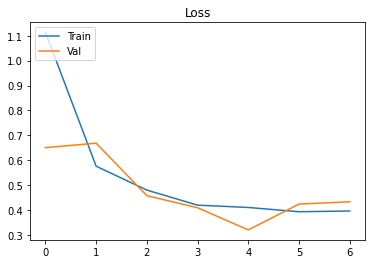

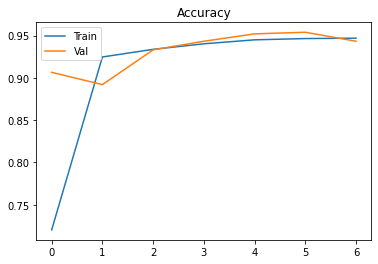

In [46]:
loss_curve = results.history["loss"]
acc_curve = results.history["accuracy"]

loss_val_curve = results.history["val_loss"]
acc_val_curve = results.history["val_accuracy"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Loss")
plt.show()

plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc='upper left')
plt.title("Accuracy")
plt.show()

In [47]:
from sklearn.metrics import confusion_matrix , classification_report , accuracy_score

y_pred2 = model2.predict(x_test1)
y_pred2 = [1 if i>=0.5 else 0 for i in y_pred2]

print('{} \n{} \n{}'.format(confusion_matrix(y_test1, y_pred2) , 
                           classification_report(y_test1 , y_pred2) , 
                           accuracy_score(y_test1 , y_pred2)))

87/87 [==============================] - 13s 148ms/step
[[1366   30]
 [ 158 1202]] 
              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94      1396
         1.0       0.98      0.88      0.93      1360

    accuracy                           0.93      2756
   macro avg       0.94      0.93      0.93      2756
weighted avg       0.94      0.93      0.93      2756
 
0.9317851959361393


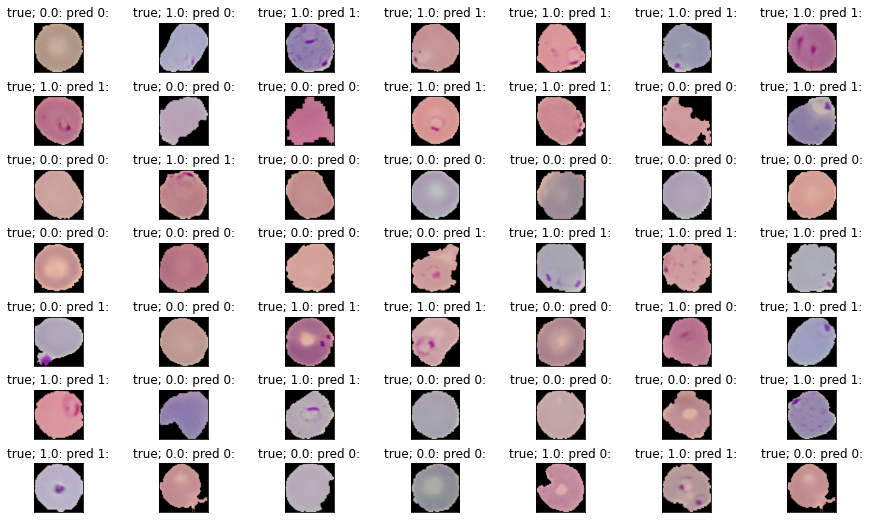

In [49]:
plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    r = np.random.randint( 0  , x_test1.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(x_test1[r[0]])
    plt.title('true; {}: pred {}:'.format(y_test1[r[0]] , y_pred2[r[0]]) )
    plt.xticks([]) , plt.yticks([])

plt.show()

Number of mistakes: 188


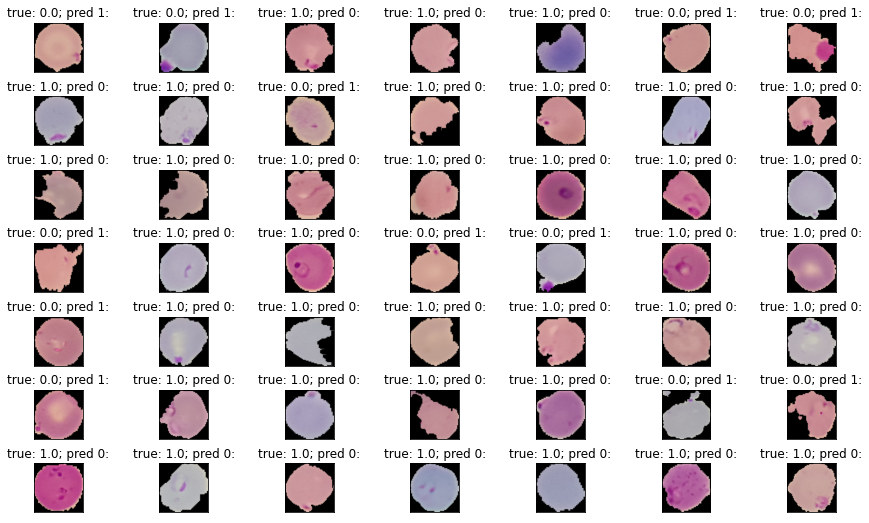

In [50]:
errors = []

for i in range(len(x_test1)):
    if y_test1[i] != y_pred2[i]:
        errors.append(i)

print("Number of mistakes: {}".format(len(errors)))

plt.figure(1 , figsize = (15 , 9))
n = 0 
for i in range(49):
    n += 1 
    # r = np.random.randint( 0  , X_test.shape[0] , 1)
    plt.subplot(7 , 7 , n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
    plt.imshow(x_test1[errors[i]])
    plt.title('true: {}; pred {}:'.format(y_test1[errors[i]] , y_pred2[errors[i]]))
    plt.xticks([]) , plt.yticks([])